# Heart Disease Binary Classification

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the heart disease of an individual based on their medical attributes.

The following approach is to be taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can the model correctly predict whether or not they have heart disease?

## 2. Data

> Kaggle: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?resource=download

> This data is sourced from the University of California Irvine's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3. Evalutation

> The project will be pursued if a 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept.

## 4. Features

### Data Dictionary
a) Age: age of patient

b) Sex: binary classification of male/female (1 or 0 respectively)

c) Chest pain type: 
* 1: Typical angina: chest pain related decrease blood supply to the heart
* 2: Atypical angina: chest pain not related to heart
* 3: Non-anginal pain: typically esophageal spasms (non heart related)
* 4: Asymptomatic: chest pain not showing signs of disease

d) BP: resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

e) Cholesterol: serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern

f) FBS over 120: A test that measures blood sugar levels; elevated levels are associated with diabetes and insulin resistance, in which the body cannot properly handle sugar (binary classification, 0 or 1)

g) EKG results: electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
* 2: Possible or definite left ventricular hypertrophy 
    * Enlarged heart's main pumping chamber

h) Max HR: maximum heart rate in bpm

i) Exercise Angina: chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood (binary classification, 0 or 1).

j) ST Depression: ST segment depression may be determined by measuring the vertical distance between the patient's trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it is more than 1 mm in V5-V6, or 1.5 mm in AVF or III

k) Slope of ST:
* 1: Upsloping: better heart rate with excercise (uncommon)
* 2: Flatsloping: minimal change (typical healthy heart)
* 3: Downslopins: signs of unhealthy heart

l) Number of vessels fluro: number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)

m) Thallium: thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising

n) Heart Disease: "Presence" or "Absence" 

## Preparing Tools

In [1]:
#regular EDA and plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.shape #rows,columns

(270, 14)

## EDA

1. what questions are to be answered?
2. what type of data do we have and how are distinct types to be treated?
3. what is missing from the data and how are missing values to be resolved?
4. what are the outliers and how are they to be resolved?
5. how to add/change/remove features to get more out of the data?

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
#number of each classification
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

Text(0, 0.5, 'Frequency')

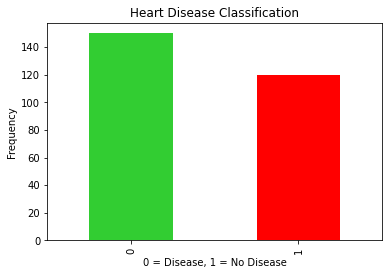

In [16]:
df["Heart Disease"].value_counts().plot(kind="bar", color=["limegreen","red"]);
plt.title("Heart Disease Classification")
plt.xlabel("0 = Disease, 1 = No Disease")
plt.ylabel("Frequency")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [10]:
#convert target column to int64
df.loc[df["Heart Disease"] == "Presence", "Heart Disease"] = 1
df.loc[df["Heart Disease"] == "Absence", "Heart Disease"] = 0

In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Sex vs Heart Disease Frequency

In [12]:
df["Sex"].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [13]:
#illustrate heuristic of predicting heart disease based on sex
pd.crosstab(df["Heart Disease"],df["Sex"])

Sex,0,1
Heart Disease,,
0,67,83
1,20,100


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

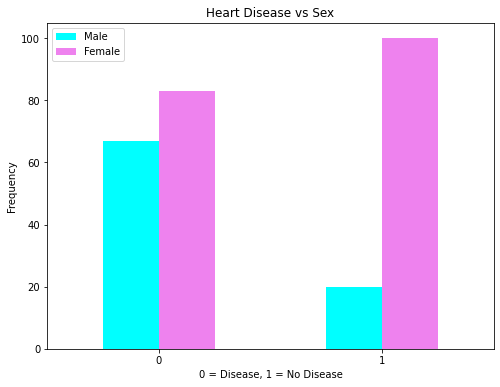

In [23]:
pd.crosstab(df["Heart Disease"],df["Sex"]).plot(kind="bar",
                                                figsize=(8,6),
                                                color=["cyan", "violet"])
plt.title("Heart Disease vs Sex")
plt.xlabel("0 = Disease, 1 = No Disease")
plt.ylabel("Frequency")
plt.legend(["Male","Female"])
plt.xticks(rotation=0)